# Cities Fingerprint
## Code name: k1

                                                  ##############################
                                                  #   **Cities Fingerprint**   #
                                                  #         MODULE_DATA        #                                                  
                                                  #                            #
                                                  #   		  codename: k1   #
                                                  #                            #
                                                  #   version = 201603171324   #
                                                  #    Issues known: none      #
                                                  #                            #
                                                  #   A script by AndresPDLR   #
                                                  ##############################


    This program extracs the fingerprint of a urban landscape according to the method
    exposed in A typology of Street Patterns by Rémi Louf, Marc Barthelemy (ATSP)
    
        http://bit.ly/1QZ83IK


    - It assumes the existence of CSV files produced by MODULE_GIS
    - Produces the key variable from ATSP called Φ for each block

**Definitions used in ATSP**

    A  = Area of the block
    AC = Area of the circumscribed circle C
    Φ  = A/AC
    P(Φ) Distribution

**Useful spanish~english translations**

    manzana = spanish for block
    edo = spanish acronym for state

<div class="alert alert-success">
**Requirements**

</div>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm
import math as mt

import datetime

import ast

from sys import argv
import csv

import os
from simpledbf import Dbf5

<div class="alert alert-success">
**Functions**
</div>

In [2]:
def de_string_list(list_as_string):
    ''' Transform string representation of list to list '''
    list_as_list = ast.literal_eval(list_as_string)
    return list_as_list

In [3]:
def dbf_to_csv(location, file):
    ''' Convert dbf files into csv '''  
    directory = os.listdir(location)
    dbf_file = Dbf5(file)
    dbf_file.to_csv(file[:-3] + 'csv')
    print('file ' + file + ' ready!')

In [4]:
def euclidean_distance(p1, p2):
    ''' Calculates euclidiean distance between two points '''
    x_1 = p1[0]
    y_1 = p1[1]
    x_2 = p2[0]
    y_2 = p2[1]
    distance = mt.sqrt(pow((x_2-x_1), 2) + pow((y_2-y_1), 2))
    return distance

In [5]:
def circumscribed_circle_area(center, node_list):
    ''' From a list of nodes, calculates circumscribed circle area '''
    distances = []
    for n in node_list:
        distance = euclidean_distance(center, n)
        distances.append(distance)
    radius = max(distances)
    Ac = mt.pi * pow(radius, 2)
    return Ac

In [6]:
def Φ_function(edo):
    '''
    This function returns Ac and Φ
        The quantity Φ is always smaller than one
        "The smaller its the value, the more anisotropic the block is" (ATSP)
    '''
    print(edo + " started at ", datetime.datetime.now().isoformat())
    Φ_dictionary = {}
    Ac_dictionary = {}

    # Loading Data
    areas = pd.read_csv('k1_areas_{}.csv'.format(edo), header=None, names=['Manzanas', 'Area'])
    centroid_coordinates = pd.read_csv('k1_centroid_coordinates_{}.csv'.format(edo), header=None, names=['Manzanas', 'Centroid Coordinates'])
    nodes_coordinates = pd.read_csv('k1_nodes_coordinates_{}.csv'.format(edo), header=None, names=['Manzanas', 'Nodes Coordinates'])
    
    # Extracting information
    for m in areas['Manzanas']:
        A = areas.loc[areas['Manzanas'] == m]['Area'].values[0]
        centroid = centroid_coordinates.loc[centroid_coordinates['Manzanas'] == m]['Centroid Coordinates'].values[0]
        nodes = nodes_coordinates.loc[nodes_coordinates['Manzanas'] == m]['Nodes Coordinates'].values[0]
        center = de_string_list(centroid)
        node_list = de_string_list(nodes)
        Ac = circumscribed_circle_area(center, node_list)
        Φ = A / Ac
        Φ_dictionary[m] = Φ
        Ac_dictionary[m] = Ac
    
    # Storing information
    writer_Φ = csv.writer(open('C:/Users/Andres/k1_Output_{}.csv'.format(edo), 'w', newline=''))
    for manzana, value in Φ_dictionary.items():
        writer_Φ.writerow([str(manzana), value])
        
    writer_Ac = csv.writer(open('C:/Users/Andres/k1_Ac_{}.csv'.format(edo), 'w', newline=''))
    for manzana, value in Ac_dictionary.items():
        writer_Ac.writerow([str(manzana), value])
    
    print(edo + " completed at ", datetime.datetime.now().isoformat())
        

In [58]:
def explore(edo):
    ''' Plots a series of charts and returns merge dataframe with all relevant information '''
    areas = pd.read_csv('k1_areas_{}.csv'.format(edo), header=None, names=['Manzanas', 'Area'])
    centroid_coordinates = pd.read_csv('k1_centroid_coordinates_{}.csv'.format(edo), header=None, names=['Manzanas', 'Centroid Coordinates'])
    nodes_coordinates = pd.read_csv('k1_nodes_coordinates_{}.csv'.format(edo), header=None, names=['Manzanas', 'Nodes Coordinates'])
    Ac = pd.read_csv('k1_Ac_{}.csv'.format(edo), header=None, names=['Manzanas', 'Ac'])
    Φ = pd.read_csv('k1_Output_{}.csv'.format(edo), header=None, names=['Manzanas', 'Φ'])
    edo_all = areas.merge(Φ, left_on = 'Manzanas', right_on='Manzanas')
    edo_all = edo_all.merge(Ac, left_on = 'Manzanas', right_on='Manzanas')
    areas.plot(figsize=(18,6), color = 'blue', alpha = .5)
    edo_all.plot(kind='scatter', x='Φ', y='Area', color = "red", alpha = .10, figsize=(18,10), xlim = (0, 1), ylim = (0, .000001))
    Φ.plot(kind = 'kde', figsize=(18,6), color = 'blue', alpha = .5)

In [10]:
def load_data(edo):
    ''' Loads edo data and returns merge dataframe with all relevant information '''
    areas = pd.read_csv('k1_areas_{}.csv'.format(edo), header=None, names=['Manzanas', 'Area'])
    centroid_coordinates = pd.read_csv('k1_centroid_coordinates_{}.csv'.format(edo), header=None, names=['Manzanas', 'Centroid Coordinates'])
    nodes_coordinates = pd.read_csv('k1_nodes_coordinates_{}.csv'.format(edo), header=None, names=['Manzanas', 'Nodes Coordinates'])
    Ac = pd.read_csv('k1_Ac_{}.csv'.format(edo), header=None, names=['Manzanas', 'Ac'])
    Φ = pd.read_csv('k1_Output_{}.csv'.format(edo), header=None, names=['Manzanas', 'Φ'])
    edo_all = areas.merge(Φ, left_on = 'Manzanas', right_on='Manzanas')
    edo_all = edo_all.merge(Ac, left_on = 'Manzanas', right_on='Manzanas')
    print('{} has been loaded!'.format(edo))
    return edo_all

In [8]:
def city_distance(city_1, city_2):
    ''' Calculates <distance> between two city street patterns '''
    # <distance> as defined in ATSP, page 5.
    bins = [(0, .0000002), (.0000002, .0000004), (.0000004, .0000006), (.0000006, .0000008), (.0000008, 1)]
    manzanas_1 = len(city_1)
    manzanas_2 = len(city_2)
    distances = []
    for alpha in bins:
        city_1_alpha = city_1.loc[(city_1['Area'] > alpha[0]) & (city_1['Area'] < alpha[1])]
        city_2_alpha = city_2.loc[(city_2['Area'] > alpha[0]) & (city_2['Area'] < alpha[1])]
        f_1_alpha = city_1_alpha['Area'].sum() / manzanas_1
        f_2_alpha = city_2_alpha['Area'].sum() / manzanas_2
        distance = pow(abs(f_1_alpha - f_2_alpha), 2)
        distances.append(distance)
    DISTANCE = sum(distances)
    return DISTANCE

In [25]:
def compare_distance(regions, region):
    ''' Measures distance between a region and a list of regions '''
    # <distance> as defined in ATSP, page 5.
    distances_rv = []
    for r in regions:
        r_distance = city_distance(region, r)
        distances_rv.append(r_distance)
    return distances_rv

<div class="alert alert-success">
**Data Analysis**
</div>

In [12]:
# call all the 32 states into dataframes:
ags = load_data('ags')      # 01
bc = load_data('bc')        # 02
bcs = load_data('bcs')      # 03
camp = load_data('camp')    # 04
coah = load_data('coah')    # 05
col = load_data('col')      # 06
chis = load_data('chis')    # 07
chih = load_data('chih')    # 08
df = load_data('df')        # 09
dgo = load_data('dgo')      # 10
gto = load_data('gto')      # 11   
gro = load_data('gro')      # 12
hgo = load_data('hgo')      # 13
jal = load_data('jal')      # 14
mex = load_data('mex')      # 15
mich = load_data('mich')    # 16
mor = load_data('mor')      # 17
nay = load_data('nay')      # 18
nl = load_data('nl')        # 19
oax = load_data('oax')      # 20
pue = load_data('pue')      # 21
qro = load_data('qro')      # 22
qroo = load_data('qroo')    # 23
slp = load_data('slp')      # 24
sin = load_data('sin')      # 25
son = load_data('son')      # 26
tab = load_data('tab')      # 27
tamps = load_data('tamps')  # 28
tlax = load_data('tlax')    # 29
ver = load_data('ver')      # 30
yuc = load_data('yuc')      # 31
zac = load_data('zac')      # 32

ags has been loaded!
bc has been loaded!
bcs has been loaded!
camp has been loaded!
coah has been loaded!
col has been loaded!
chis has been loaded!
chih has been loaded!
df has been loaded!
dgo has been loaded!
gto has been loaded!
gro has been loaded!
hgo has been loaded!
jal has been loaded!
mex has been loaded!
mich has been loaded!
mor has been loaded!
nay has been loaded!
nl has been loaded!
oax has been loaded!
pue has been loaded!
qro has been loaded!
qroo has been loaded!
slp has been loaded!
sin has been loaded!
son has been loaded!
tab has been loaded!
tamps has been loaded!
tlax has been loaded!
ver has been loaded!
yuc has been loaded!
zac has been loaded!


In [14]:
# create dataframe_all for all states (entire Mexico) 

edos_dataframes = [ags,  bc, bcs,  camp, coah, col, chis, chih,
                   df, dgo, gro, gto, hgo, jal, mex, mich,
                   mor, nay, nl, oax, pue, qro, qroo, slp,
                   sin, son, tab, tamps, tlax, ver, yuc, zac]

dataframe_all = pd.concat(edos_dataframes)



In [62]:
dataframe_all.head()

,Manzanas,Area,Φ,Ac
0,0100100014325009,1.514624e-06,0.159168,9.515873e-06
1,0100100014325008,1.833420e-07,0.224965,8.149784e-07
2,0100100014325005,8.994317e-07,0.187952,4.785435e-06
3,0100100014325004,8.021103e-07,0.196058,4.091192e-06
4,0100100014325007,6.534422e-07,0.303527,2.152833e-06


In [48]:
# Number of blocks in Mexico
len(dataframe_all)

1456596

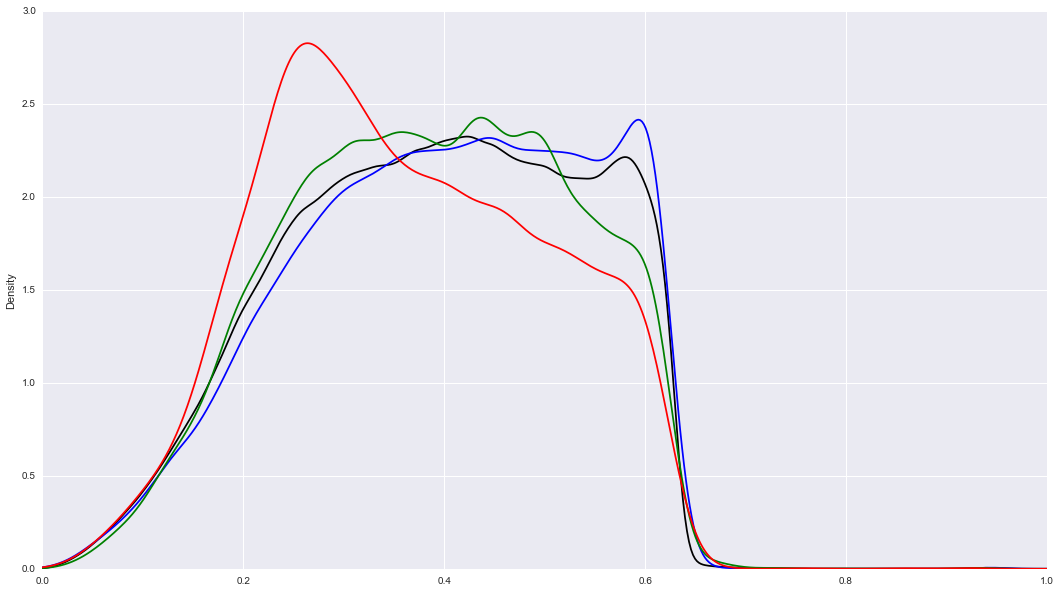

In [54]:
# Compare a region (instances = [ags, df, mich]) with national overall distribution
dataframe_all['Φ'].plot(kind = 'kde', color = 'black', figsize=(18,10), xlim = (0, 1))
mich['Φ'].plot(kind = 'kde', color = 'blue', figsize=(18,10), xlim = (0, 1))
df['Φ'].plot(kind = 'kde', color = 'green', figsize=(18,10), xlim = (0, 1))
ags['Φ'].plot(kind = 'kde', color = 'red', figsize=(18,10), xlim = (0, 1))

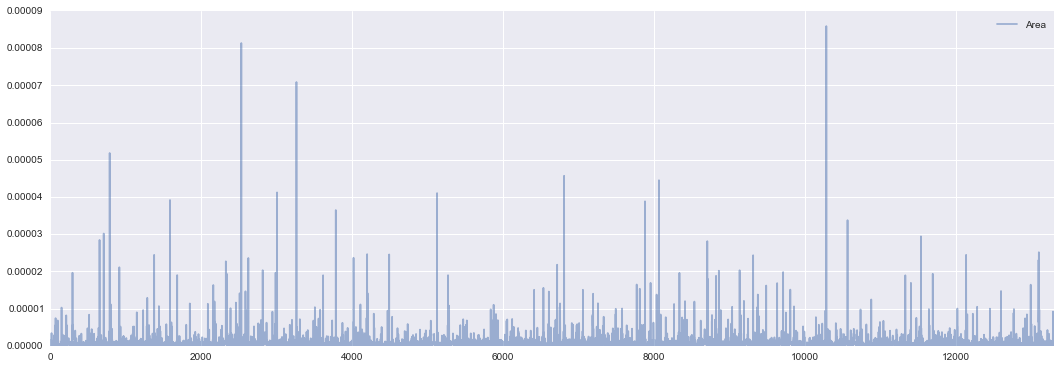

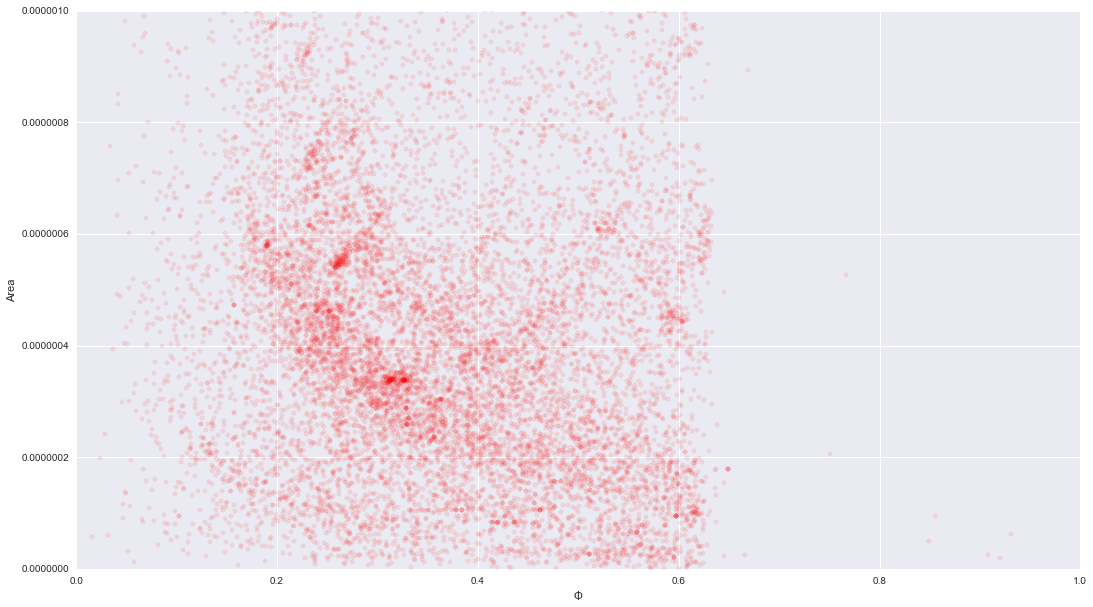

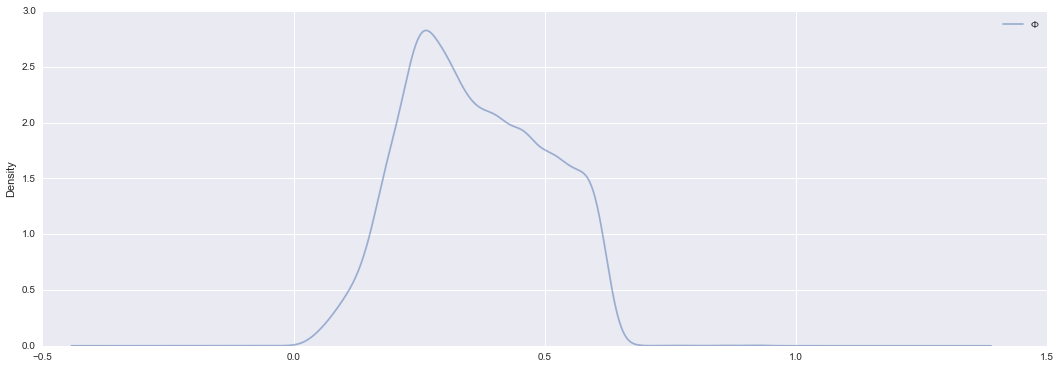

In [59]:
# Instance state of ags  
explore('ags')